# Fits to UHECR data

Fitting both the arrival direction and joint models to the publicly available data form the Pierre Auger observatory. This notebook goes through the case of the SBG catalogue, but the case for 2FHL and Swift-BAT catalogues is exactly the same just changing the catalogue label.
<br>
<br>
*This code is used to produce the data shown in Figures 10, 11 and 12 in Capel & Mortlock (2019).
See the separate notebook in this directory for the actual plotting of figures*.

In [1]:
import os
from fancy import Data, Model, Analysis
# from fancy.detector.auger2014 import detector_properties
from fancy.detector.TA2015 import detector_properties

In [2]:
source_type = "2FHL_250Mpc"
# Define data files
source_file = '../data/sourcedata.h5'
uhecr_file = '../data/UHECRdata.h5'
# table_file = '../data/tables_SBG_23.h5'
# table_file = '../data/tables_SBG_23_TA.h5'
# table_file = '../data/tables_2FHL_250Mpc.h5'
table_file = '../data/tables_{0}_TA.h5'.format(source_type)

# make output directory if it doesnt exist
if not os.path.isdir("output"):
    os.mkdir("output")

# Define output for arrival direction and joint models respectively
# arrival_output_file = 'output/arrival_fit.h5'
# joint_output_file = 'output/joint_fit.h5'
arrival_output_file = 'output/arrival_fit_{0}_TA.h5'.format(source_type)
joint_output_file = 'output/joint_fit_{0}_TA.h5'.format(source_type)

# Define stan path
stan_path = '../stan/'

# Random seed for reproducibility
random_seed = 19920715
# import numpy as np
# random_seed = np.random.randint(99999999)

## Data

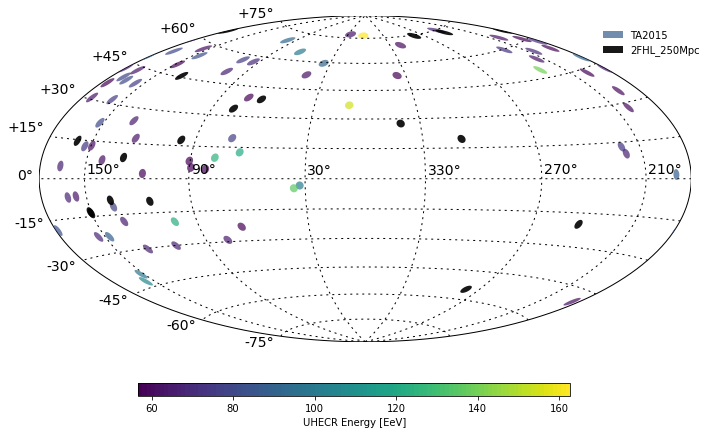

In [3]:
data = Data()
data.add_source(source_file, source_type)
# data.add_source(source_file, '2FHL_250Mpc')
# data.add_uhecr(uhecr_file, "auger2014")
data.add_uhecr(uhecr_file, "TA2015")
data.add_detector(detector_properties)
data.show();

In [4]:
len(data.uhecr.zenith_angle)

72

## Arrival direction model

In [5]:
Eth = 57
# Eth = 52

arrival_model = stan_path + 'arrival_direction_model.stan'
model = Model(model_filename = arrival_model, include_paths = stan_path)
model.compile()
model.input(Eth = Eth) # EeV

Using cached StanModel


In [6]:
# What is happening 
# summary = b'Fit of the joint model to the Auger data' 
summary = b'Fit of the joint model to the TA data' 
    
# Define an Analysis object to bring together Data and Model objects
analysis = Analysis(data, model, analysis_type = 'joint', 
                    filename = arrival_output_file, summary = summary)

# Define location of pre-computed values used in fits 
# (see relevant notebook for how to make these files) 
# Each catalogue has a file of pre-computed values
analysis.use_tables(table_file)

skipped simulation values


In [7]:
# # Fit the Stan model
# fit = analysis.fit_model(chains = 4, iterations = 2000, seed = random_seed)

# # Save to analysis file
# analysis.save()

In [8]:
# Fit the Stan model
fit = analysis.fit_model(chains = 16, iterations = 500, seed = random_seed)

# Save to analysis file
analysis.save()

## Joint model

In [9]:
joint_model = stan_path + 'joint_model.stan'
model = Model(model_filename = joint_model, include_paths = stan_path)
model.compile()
model.input(Eth = Eth) # EeV

Using cached StanModel


In [10]:
# What is happening 
# summary = b'Fit of the joint model to the Auger data' 
summary = b'Fit of the joint model to the TA data' 
    
# Define an Analysis object to bring together Data and Model objects
analysis = Analysis(data, model, analysis_type = 'joint', 
                    filename = joint_output_file, summary = summary)

# Define location of pre-computed values used in fits 
# (see relevant notebook for how to make these files) 
# Each catalogue has a file of pre-computed values
analysis.use_tables(table_file)

skipped simulation values


In [11]:
# # Fit the Stan model
# fit = analysis.fit_model(chains = 4, iterations = 2000, seed = random_seed)

# # Save to analysis file
# analysis.save()

In [12]:
# Fit the Stan model
fit = analysis.fit_model(chains = 16, iterations = 500, seed = random_seed)

# Save to analysis file
analysis.save()

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
